In [25]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
import os

In [2]:
os.chdir('C:/Users/mohit/Downloads/Compressed/archive_2')
dir = os.getcwd()
dir

'C:\\Users\\mohit\\Downloads\\Compressed\\archive_2'

In [3]:
train_data = os.path.join('train')
test_data = os.path.join('test')

In [4]:
files = os.listdir(train_data)
print(files[:3])

['angry', 'disgusted', 'fearful']


## Tranfer Learning

In [5]:
mobilenet_v2 = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

In [6]:
import tensorflow_hub as hub
mobile_net_layers = hub.KerasLayer(mobilenet_v2, input_shape=(224,224,3))

In [7]:
mobile_net_layers.trainable = False

### CNN model for training 

In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [6]:
#  mod = tf.keras.applications.MobileNetV2(
#     input_shape=(224,224,3),
#     alpha=1.0,
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax")

In [7]:
mod = tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(75,75,3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [8]:
ip=mod.layers[0].input
op=mod.layers[-2].output


In [9]:
op

<KerasTensor: shape=(None, 1, 1, 192) dtype=float32 (created by layer 'activation_93')>

In [10]:
final_output=tf.keras.layers.Flatten()(op)
final_output=tf.keras.layers.Dense(1024)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.3)(final_output)
final_output=tf.keras.layers.Dense(512)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.3)(final_output)
final_output=tf.keras.layers.Dense(7,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [11]:
model=tf.keras.Model(inputs =ip,outputs=final_output)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 75, 75, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 37, 37, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 37, 37, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 37, 37, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [12]:
# model = tf.keras.models.Sequential([
    
#     op,
#     tf.keras.layers.Dense(1024 , activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(512 , activation='relu'),
#     tf.keras.layers.Dense(7 , activation='softmax')
    
# ])

In [13]:
# model.summary()

In [15]:
model.compile(loss = 'categorical_crossentropy',
             optimizer='Adam',
             metrics=['accuracy'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale = 1/255,
#     rotation_range=40,#rotates the image in 0 to 40 degree range randomly
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2, 
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'# lost pixels are replaced by the nearest pixels
)

train_data_gen = train_gen.flow_from_directory(train_data , 
                                              target_size = (75,75),
                                              batch_size=10,
                                              class_mode="categorical")

test_gen = ImageDataGenerator(rescale = 1/255)
test_data_gen = test_gen.flow_from_directory(test_data ,
                                             target_size = (75,75),
                                             batch_size = 10,
                                             class_mode = "categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model_fiting = model.fit(train_data_gen ,steps_per_epoch=10,epochs=50,validation_data=test_data_gen, verbose=1 ,batch_size =10 )

Epoch 1/50
10/10 [==============================] - 26s 2s/step - loss: 2.0357 - accuracy: 0.1600 - val_loss: 39.7051 - val_accuracy: 0.1335
Epoch 2/50
10/10 [==============================] - 16s 2s/step - loss: 2.0927 - accuracy: 0.1400 - val_loss: 56.6550 - val_accuracy: 0.1335
Epoch 3/50
10/10 [==============================] - 15s 2s/step - loss: 2.0253 - accuracy: 0.1700 - val_loss: 42.9002 - val_accuracy: 0.1737
Epoch 4/50
10/10 [==============================] - 15s 2s/step - loss: 1.9527 - accuracy: 0.1800 - val_loss: 2.7311 - val_accuracy: 0.1718
Epoch 5/50
10/10 [==============================] - 15s 2s/step - loss: 1.9351 - accuracy: 0.1800 - val_loss: 2.3011 - val_accuracy: 0.1778
Epoch 6/50
10/10 [==============================] - 16s 2s/step - loss: 1.8889 - accuracy: 0.1900 - val_loss: 5.0172 - val_accuracy: 0.1785
Epoch 7/50
10/10 [==============================] - 16s 2s/step - loss: 2.0094 - accuracy: 0.2900 - val_loss: 8.1646 - val_accuracy: 0.2477
Epoch 8/50
10/10 

In [23]:
acc = model_fiting.history["accuracy"]
validation_acc = model_fiting.history["val_accuracy"]
print(acc)
print(validation_acc)

[0.4038803279399872, 0.48716431856155396, 0.5143334865570068, 0.5260371565818787, 0.5280225872993469, 0.5287540555000305, 0.5242258310317993, 0.5158312916755676, 0.5230067372322083, 0.5153436064720154, 0.5120694041252136, 0.5110592246055603, 0.49183183908462524, 0.4919363260269165, 0.47831690311431885, 0.47270891070365906, 0.4699919819831848, 0.4672054052352905, 0.4679368734359741, 0.4598906338214874, 0.447455495595932, 0.45038142800331116, 0.4596816301345825, 0.44863981008529663, 0.4461666941642761, 0.4341147243976593, 0.4348810613155365, 0.42578983306884766, 0.4357866942882538, 0.43286076188087463, 0.4259988069534302, 0.42993485927581787, 0.4176042377948761, 0.43003934621810913, 0.4301438629627228, 0.4339753985404968, 0.4201818108558655, 0.4241527020931244, 0.4179525673389435, 0.4235953986644745, 0.42481452226638794, 0.4183008670806885, 0.4243617057800293, 0.42356055974960327, 0.4276010990142822, 0.4201818108558655, 0.4373193085193634, 0.43160679936408997, 0.429447203874588, 0.431397

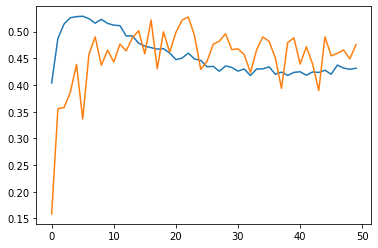

In [24]:
import matplotlib.pyplot as plt
epochs=range(len(acc))
plt.plot(epochs ,acc )
plt.plot(epochs, validation_acc)
plt.show()